In [107]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='Arial')

In [108]:
df = pd.read_csv('..\\data\\pareto\\sales_act.csv',index_col=0)
df=df.join(pd.read_csv('..\\data\\pareto\\sales_sa.csv',index_col=0))
df=df.join(pd.read_csv('..\\data\\pareto\\new_list_act.csv',index_col=0))
df=df.join(pd.read_csv('..\\data\\pareto\\new_list_sa.csv',index_col=0))

df.index=df.index.rename('Date')

<AxesSubplot:title={'center':'New Listings'}, xlabel='Date'>

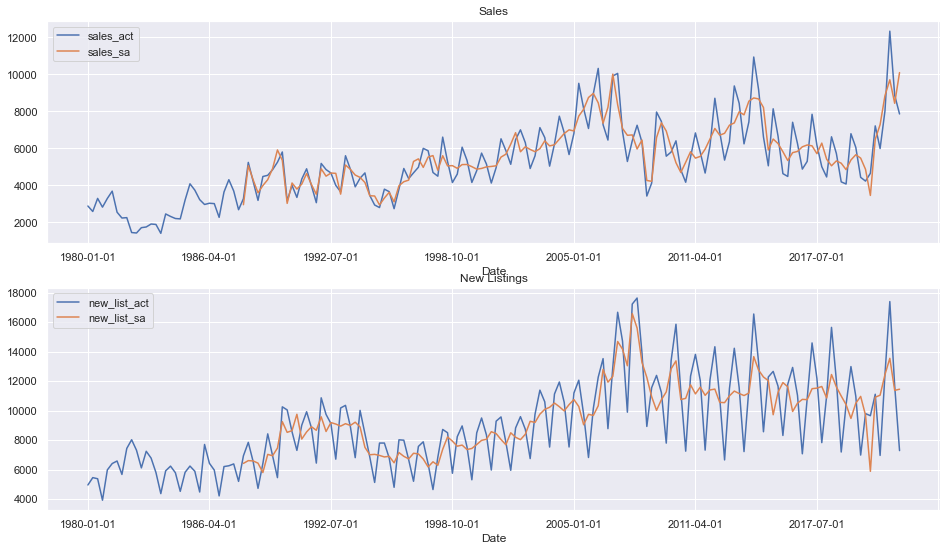

In [109]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(16,9))

df[['sales_act','sales_sa']].plot(ax=ax[0],title='Sales')
df[['new_list_act','new_list_sa']].plot(ax=ax[1],title='New Listings')

In [113]:
real_income = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='RealDisposableIncome',engine='openpyxl',index_col=0)[['AB']]
real_income.rename({'AB':'RealDisposableIncome'},axis=1,inplace=True)

real_gdp = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='RealGDP',engine='openpyxl',index_col=0)[['AB']]
real_gdp.rename({'AB':'RealGDP'},axis=1,inplace=True)

unemp = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='Unemployment',engine='openpyxl',index_col=0)[['AB']]
unemp.rename({'AB':'Unemployment'},axis=1,inplace=True)

employment = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='Employment',engine='openpyxl',index_col=0)[['AB']]
employment.rename({'AB':'Employment'},axis=1,inplace=True)

cpi = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='CPI',engine='openpyxl',index_col=0,header=1)[['AB']]
cpi.rename({'AB':'CPI'},axis=1,inplace=True)

prov_econ=real_gdp.join(real_income)
prov_econ=prov_econ.join(unemp)
prov_econ=prov_econ.join(employment)
prov_econ=prov_econ.join(cpi)
prov_econ.index=prov_econ.index.rename('Date')
prov_econ.index=pd.PeriodIndex(prov_econ.index,freq='Q').to_timestamp()

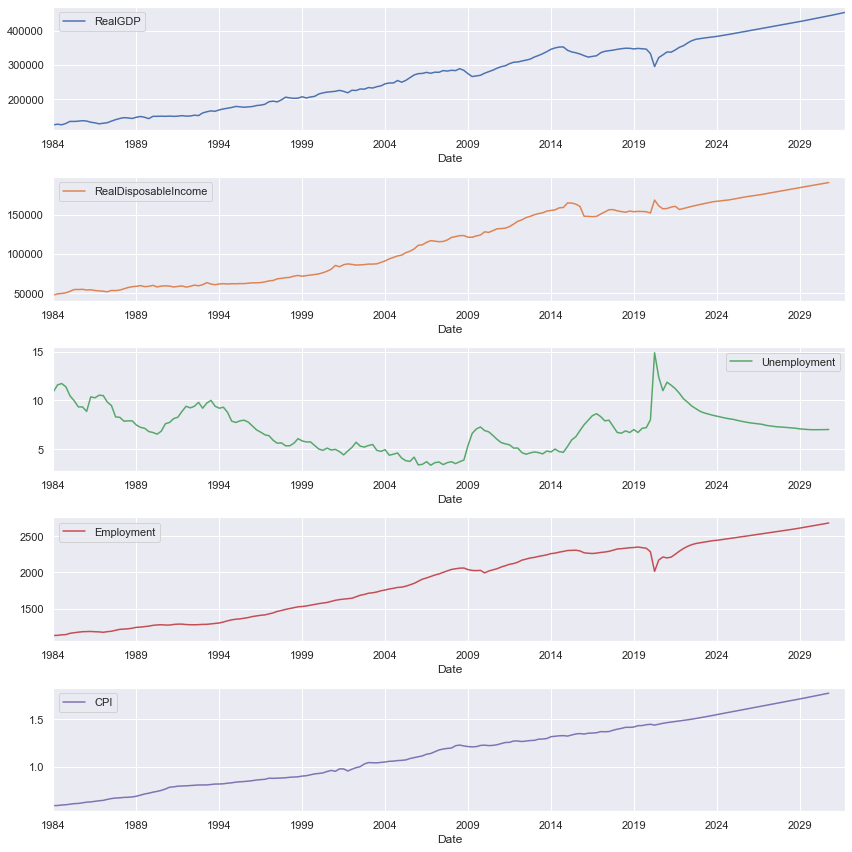

In [114]:

fig, ax = plt.subplots(nrows=5,ncols=1,figsize=(12,12))
prov_econ.plot(ax=ax,subplots=True)
plt.tight_layout()

In [115]:
prov_econ

,RealGDP,RealDisposableIncome,Unemployment,Employment,CPI
Date,,,,,
1984-01-01,124537.696000,47427.905649,10.900000,1131.646718,0.593435
1984-04-01,126432.684000,49015.069966,11.600000,1132.964409,0.595181
1984-07-01,124688.800000,49448.102005,11.733333,1140.598043,0.600481
1984-10-01,128648.819000,50330.216996,11.400000,1143.396344,0.603223
1985-01-01,134650.900000,52204.214947,10.466667,1161.538977,0.608993
...,...,...,...,...,...
2030-10-01,443518.991283,191244.926228,7.009560,2681.132009,1.771857
2031-01-01,446062.788990,NaN,NaN,NaN,NaN
2031-04-01,448636.526604,NaN,NaN,NaN,NaN


In [96]:
nat_econ=pd.read_excel('../data/BaselineNationalForecasts.xlsx',header=1,index_col=0,engine='openpyxl',sheet_name='Quarterly')[3:-11]
energy = pd.read_excel('../data/BaselineNationalForecasts.xlsx',sheet_name='Energy',header=1,index_col=0,engine='openpyxl')

In [99]:
nat_econ.index = nat_econ.index.str.replace(' ','')
nat_econ.index=nat_econ.index.rename('Date')
nat_econ.index=pd.PeriodIndex(nat_econ.index,freq='Q').to_timestamp()


C:\Users\Maln\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


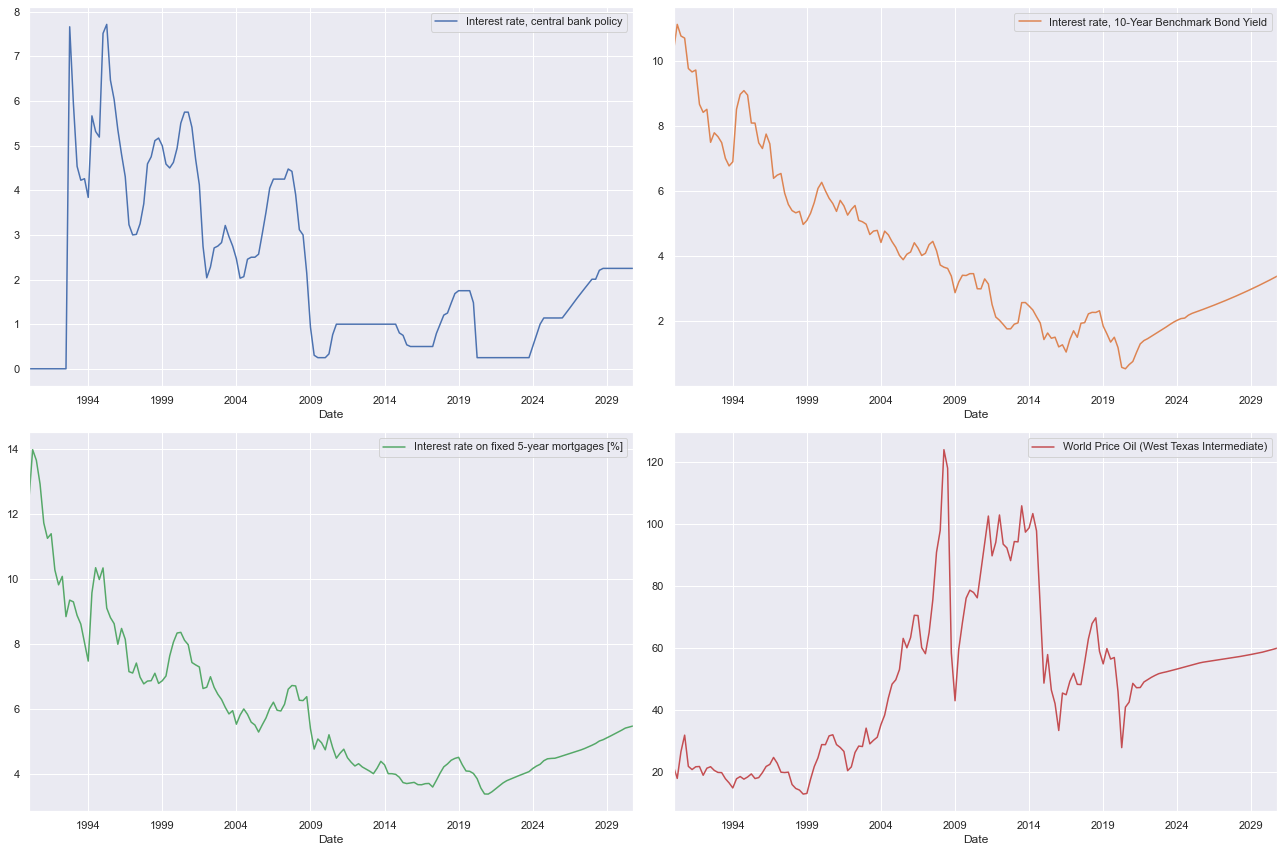

In [106]:

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(18,12))
nat_econ['1990':][['Interest rate, central bank policy','Interest rate, 10-Year Benchmark Bond Yield','Interest rate on fixed 5-year mortgages [%]']].plot(ax=ax,subplots=True)
plt.tight_layout()